<a href="https://colab.research.google.com/github/neophoca/PublicTest/blob/main/MOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ffmpeg

  Created wheel for ffmpeg: filename=ffmpeg-1.4-cp36-none-any.whl size=6083 sha256=3b4c90978bba3ca5880f9991424f26ad007a162c91ee8e0d7fc9f61ffa5b18a5
  Stored in directory: /root/.cache/pip/wheels/b6/68/c3/a05a35f647ba871e5572b9bbfc0b95fd1c6637a2219f959e7a
Successfully built ffmpeg


In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import ffmpeg


vp='/content/drive/MyDrive/AIK/Tracking/1-2 ph 20x 1.avi'
vp1='/content/drive/MyDrive/AIK/Tracking/60.mp4'

In [ ]:
#the first 30 sec

! ffmpeg -y -loglevel info -i '/content/drive/MyDrive/AIK/Tracking/1-2 ph 20x 1.avi' -t 30 '/content/drive/MyDrive/AIK/Tracking/60.mp4'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
! ffmpeg -y -loglevel info -i '/content/drive/MyDrive/AIK/Tracking/1-2 ph 20x 1.avi' -t 60 -r 60 -vf "scale=iw/3:ih/3" '/content/drive/MyDrive/AIK/Tracking/60.mp4'

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
%cd '/content/drive/MyDrive/AIK/Tracking/frames1/'


/content/drive/MyDrive/AIK/Tracking/frames1


In [ ]:
!ffmpeg -i '/content/drive/MyDrive/AIK/Tracking/60.mp4' -vf fps=60 %d.png

ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

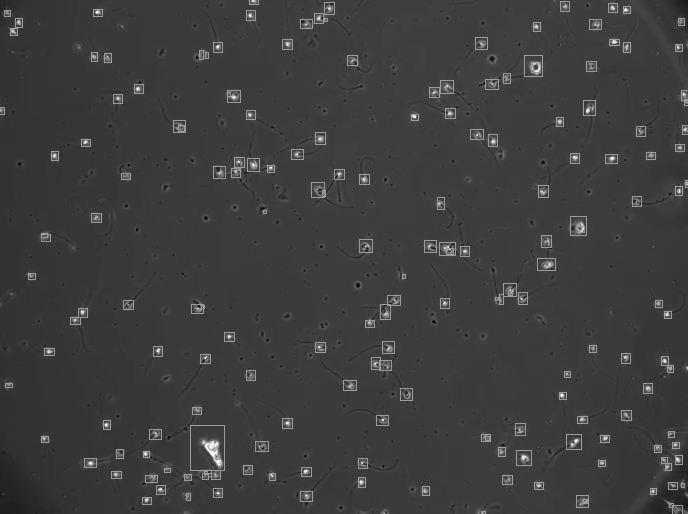

In [ ]:
img = cv2.imread('/content/drive/MyDrive/AIK/Tracking/frames1/9.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernels = np.ones((2, 2), np.uint8)
img_erode = cv2.erode(img_gray, kernels, iterations=1)
img_dilation = cv2.dilate(img_erode, kernels, iterations=1)
ret, otsu = cv2.threshold(img_dilation, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

contours, hierarchy = cv2.findContours(otsu,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for c in contours:
  x,y,w,h = cv2.boundingRect(c)
  if w>1 and h>1:
    cv2.rectangle(img_gray,(x-w//2,y-h//2),(x+w,y+h),(155,155,0),1)
cv2_imshow(img_gray)

In [ ]:
from scipy.spatial import distance as dist
from collections import OrderedDict
import numpy as np

def findCentroids(path):
  points = []
  img = cv2.imread(path)
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  kernels = np.ones((2, 2), np.uint8)
  img_erode = cv2.erode(img_gray, kernels, iterations=1)
  img_dilation = cv2.dilate(img_erode, kernels, iterations=1)
  ret, otsu = cv2.threshold(img_dilation, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

  contours, hierarchy = cv2.findContours(otsu,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    if w>1 and h>1:
      points.append([x+w//2, y+h//2])
  return img, points


class CentroidTracker():
  def __init__(self, maxDisappeared=50):
    self.nextObjectID = 0
    self.objects = OrderedDict()
    self.disappeared = OrderedDict()
    self.maxDisappeared = maxDisappeared

  def register(self, centroid):
    self.objects[self.nextObjectID] = centroid
    self.disappeared[self.nextObjectID] = 0
    self.nextObjectID += 1

  def deregister(self, objectID):
    del self.objects[objectID]
    del self.disappeared[objectID]

  def update(self, points):
    if len(points) == 0:
      for objectID in list(self.disappeared.keys()):
        self.disappeared[objectID] += 1
        if self.disappeared[objectID] > self.maxDisappeared:
          self.deregister(objectID)
      return self.objects    

    if len(self.objects) == 0:
      for i in range(0, len(points)):
        self.register(points[i])
    else:
      objectIDs = list(self.objects.keys())
      objectCentroids = list(self.objects.values())
      D = dist.cdist(np.array(objectCentroids), points)
      rows = D.min(axis=1).argsort()
      cols = D.argmin(axis=1)[rows]
      usedRows = set()
      usedCols = set()
      for (row, col) in zip(rows, cols):
        if row in usedRows or col in usedCols:
          continue
        objectID = objectIDs[row]
        self.objects[objectID] = points[col]
        self.disappeared[objectID] = 0
        usedRows.add(row)
        usedCols.add(col)
        unusedRows = set(range(0, D.shape[0])).difference(usedRows)
        unusedCols = set(range(0, D.shape[1])).difference(usedCols)
      if D.shape[0] >= D.shape[1]:
        for row in unusedRows:
          objectID = objectIDs[row]
          self.disappeared[objectID] += 1
          if self.disappeared[objectID] > self.maxDisappeared:
            self.deregister(objectID)

c = CentroidTracker()

colors = []

colors=[
    [255,0,0],
    [0,255,0],
    [0,0,255],
    [144, 12, 63],
    [16, 115, 155],
    [255, 195, 0],
    [16, 155, 126],
    [57, 16, 155],
    [155, 56, 16],
    [126, 16, 155],
    [16, 126, 155],
    [41, 155, 16]]
for cr in range(256):
    color = list(np.random.random(size=3) * 256)
    #colors.append(color)

coords = []
line_thickness = 2
vid = []

for i in range(1,60):
  img, points = findCentroids('/content/drive/MyDrive/AIK/Tracking/frames1/{0}.png'.format(i))
  c.update(points)
  coords.append(c.objects.copy())
  for m in range(len(coords)):
    if m > 0:
      for key,_ in coords[0].items():
        v = coords[m][key]
        v1 = coords[m-1][key]
        if v[0] != v1[0] or v[1] != v1[1]:
          cv2.line(img, (v[0], v[1]), (v1[0], v1[1]), colors[key % len(colors)], thickness=line_thickness)
  cv2.imwrite('/content/drive/MyDrive/AIK/Tracking/frames5/{}.png'.format(i),img) 
print('-----------------------------------------------------')
  


-----------------------------------------------------


In [ ]:
%cd /content/drive/MyDrive/AIK/Tracking/frames5
!ffmpeg -r 30 -i %d.png -vcodec mpeg4 -y movie2.mp4

/content/drive/MyDrive/AIK/Tracking/frames5
ffmpeg version 3.4.8-0ubuntu0.2 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 7 (Ubuntu 7.5.0-3ubuntu1~18.04)
  configuration: --prefix=/usr --extra-version=0ubuntu0.2 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --enable-gpl --disable-stripping --enable-avresample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librubberband --enable-librsvg --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvorbis --enable-libvpx --enable-libwavpack --enable-libwebp --enable-libx265 --